In [1]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [2]:
Eb_N0_test = [0, 1, 2, 3, 4, 5, 6, 7]
input_column = 'message'

Column deleter function

In [3]:
def column_delete(file_path, column_name):
    df = pd.read_csv(file_path)

    # Sprawdzenie, czy kolumna 'bch_dec' istnieje, a jeśli tak, usunięcie jej
    if column_name in df.columns:
        df = df.drop(columns=[column_name])
        print(f"Column '{column_name}' deleted in {file_path}.")

        # Zapis zmodyfikowanego DataFrame z powrotem do pliku CSV
        df.to_csv(file_path, index=False)
    else:
        print(f"Column '{column_name}' does not exist in {file_path}.")

Count BER function

In [4]:
def count_ber(input_codeword, output_codeword):
    ber = torch.mean((input_codeword != output_codeword).float()).item()
    return ber

Count BER between original and decoded columns

In [5]:
ber_bch_decoded = []
ber_mlp_bch_decoded = []
ber_cnn_bch_decoded = []
ber_mlp_decoded = []
ber_cnn_decoded = []

# Funkcja do obliczania BER między dwiema kolumnami
def ber_between_columns(Eb_N0, input_column, output_column, result_list):
    for elem in Eb_N0:
        # Ścieżka do pliku CSV
        file_path = f"output/output_{elem}.csv"
        
        # Wczytanie pliku CSV do DataFrame
        df = pd.read_csv(file_path)
        
        # Funkcja do konwersji ciągu tekstowego na listę floatów
        def convert_to_float_list(string):
            return list(map(float, string.split(', ')))
        
        # Zastosowanie konwersji dla każdej komórki w kolumnach
        input_codeword_list = df[input_column].apply(convert_to_float_list).values
        output_codeword_list = df[output_column].apply(convert_to_float_list).values
        
        # Przekształcenie danych na tensory PyTorch
        input_codeword_tensor = torch.tensor(input_codeword_list.tolist(), dtype=torch.float32)
        output_codeword_tensor = torch.tensor(output_codeword_list.tolist(), dtype=torch.float32)
        
        # Obliczenie BER
        ber = count_ber(input_codeword_tensor, output_codeword_tensor)
        
        # Wyświetlenie wyniku BER dla tego pliku
        print(f"BER between '{input_column}' and '{output_column}' in {file_path}: {ber:.7f}")
        
        # Dodanie wyniku BER do odpowiedniej listy
        result_list.append(ber)

In [6]:
print("\n")
ber_between_columns(Eb_N0_test, input_column, 'bch_decoded', ber_bch_decoded)
print("\n")
ber_between_columns(Eb_N0_test, input_column, 'mlp_bch_decoded', ber_mlp_bch_decoded)
print("\n")
ber_between_columns(Eb_N0_test, input_column, 'cnn_bch_decoded', ber_cnn_bch_decoded)
print("\n")
ber_between_columns(Eb_N0_test, input_column, 'mlp_decoded', ber_mlp_decoded)
print("\n")
ber_between_columns(Eb_N0_test, input_column, 'cnn_decoded', ber_cnn_decoded)



BER between 'message' and 'bch_decoded' in output/output_0.csv: 0.0292303
BER between 'message' and 'bch_decoded' in output/output_1.csv: 0.0127509
BER between 'message' and 'bch_decoded' in output/output_2.csv: 0.0045854
BER between 'message' and 'bch_decoded' in output/output_3.csv: 0.0011355
BER between 'message' and 'bch_decoded' in output/output_4.csv: 0.0002182
BER between 'message' and 'bch_decoded' in output/output_5.csv: 0.0000297
BER between 'message' and 'bch_decoded' in output/output_6.csv: 0.0000023
BER between 'message' and 'bch_decoded' in output/output_7.csv: 0.0000000


BER between 'message' and 'mlp_bch_decoded' in output/output_0.csv: 0.0117730
BER between 'message' and 'mlp_bch_decoded' in output/output_1.csv: 0.0035847
BER between 'message' and 'mlp_bch_decoded' in output/output_2.csv: 0.0008990
BER between 'message' and 'mlp_bch_decoded' in output/output_3.csv: 0.0001851
BER between 'message' and 'mlp_bch_decoded' in output/output_4.csv: 0.0000194
BER between 'm

In [7]:
print("Length of Eb_N0_test:", len(Eb_N0_test))
print("Length of ber_bch_decoded:", len(ber_bch_decoded))
print("Length of ber_mlp_bch_decoded:", len(ber_mlp_bch_decoded))
print("Length of ber_cnn_bch_decoded:", len(ber_cnn_bch_decoded))
print("Length of ber_mlp_decoded:", len(ber_mlp_decoded))
print("Length of ber_cnn_decoded:", len(ber_cnn_decoded))

Length of Eb_N0_test: 8
Length of ber_bch_decoded: 8
Length of ber_mlp_bch_decoded: 8
Length of ber_cnn_bch_decoded: 8
Length of ber_mlp_decoded: 8
Length of ber_cnn_decoded: 8


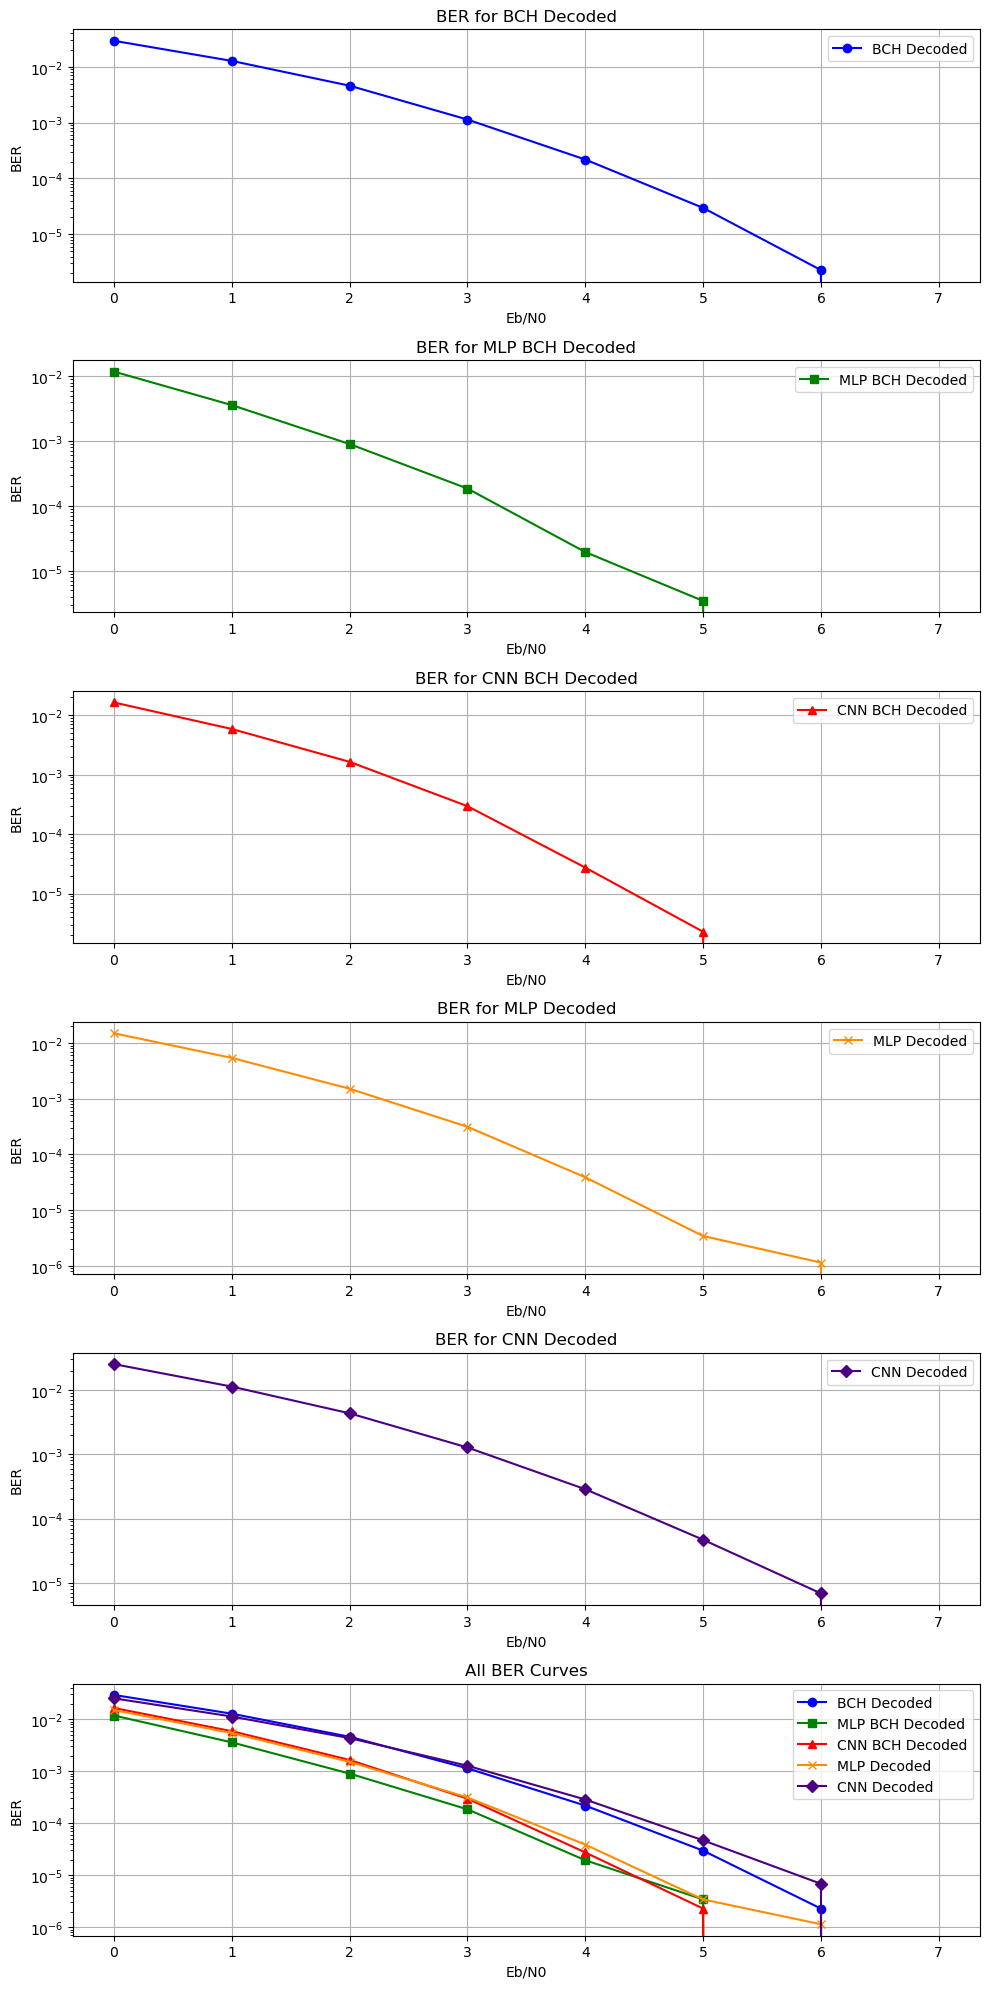

In [8]:
fig, axs = plt.subplots(6, 1, figsize=(10, 20))

# Wykres 1: BCH Decoded
axs[0].plot(Eb_N0_test, ber_bch_decoded, marker='o', color='b', label='BCH Decoded')
axs[0].set_title('BER for BCH Decoded')
axs[0].set_xlabel('Eb/N0')
axs[0].set_ylabel('BER')
axs[0].set_xticks(Eb_N0_test)
axs[0].set_yscale('log')  # Logarytmiczna skala osi Y
axs[0].grid(True)
axs[0].legend()

# Wykres 2: MLP BCH Decoded
axs[1].plot(Eb_N0_test, ber_mlp_bch_decoded, marker='s', color='g', label='MLP BCH Decoded')
axs[1].set_title('BER for MLP BCH Decoded')
axs[1].set_xlabel('Eb/N0')
axs[1].set_ylabel('BER')
axs[1].set_xticks(Eb_N0_test)
axs[1].set_yscale('log')  # Logarytmiczna skala osi Y
axs[1].grid(True)
axs[1].legend()

# Wykres 3: CNN BCH Decoded
axs[2].plot(Eb_N0_test, ber_cnn_bch_decoded, marker='^', color='r', label='CNN BCH Decoded')
axs[2].set_title('BER for CNN BCH Decoded')
axs[2].set_xlabel('Eb/N0')
axs[2].set_ylabel('BER')
axs[2].set_xticks(Eb_N0_test)
axs[2].set_yscale('log')  # Logarytmiczna skala osi Y
axs[2].grid(True)
axs[2].legend()

# Wykres 4: MLP Decoded (poprawiony kolor)
axs[3].plot(Eb_N0_test, ber_mlp_decoded, marker='x', color='darkorange', label='MLP Decoded')
axs[3].set_title('BER for MLP Decoded')
axs[3].set_xlabel('Eb/N0')
axs[3].set_ylabel('BER')
axs[3].set_xticks(Eb_N0_test)
axs[3].set_yscale('log')  # Logarytmiczna skala osi Y
axs[3].grid(True)
axs[3].legend()

# Wykres 5: CNN Decoded (poprawiony tytuł)
axs[4].plot(Eb_N0_test, ber_cnn_decoded, marker='D', color='#4B0082', label='CNN Decoded')
axs[4].set_title('BER for CNN Decoded')
axs[4].set_xlabel('Eb/N0')
axs[4].set_ylabel('BER')
axs[4].set_xticks(Eb_N0_test)
axs[4].set_yscale('log')  # Logarytmiczna skala osi Y
axs[4].grid(True)
axs[4].legend()

# Wykres 6: Summarison (wszystkie 3 linie na jednym wykresie)
axs[5].plot(Eb_N0_test, ber_bch_decoded, marker='o', color='b', label='BCH Decoded')
axs[5].plot(Eb_N0_test, ber_mlp_bch_decoded, marker='s', color='g', label='MLP BCH Decoded')
axs[5].plot(Eb_N0_test, ber_cnn_bch_decoded, marker='^', color='r', label='CNN BCH Decoded')
axs[5].plot(Eb_N0_test, ber_mlp_decoded, marker='x', color='darkorange', label='MLP Decoded')
axs[5].plot(Eb_N0_test, ber_cnn_decoded, marker='D', color='#4B0082', label='CNN Decoded')
axs[5].set_title('All BER Curves')
axs[5].set_xlabel('Eb/N0')
axs[5].set_ylabel('BER')
axs[5].set_xticks(Eb_N0_test)
axs[5].set_yscale('log')  # Logarytmiczna skala osi Y
axs[5].grid(True)
axs[5].legend()

# Dopasowanie układu i pokazanie wykresów
plt.tight_layout()
plt.show()
